In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/datahagward/Downloads/advertising/Advertising.csv")
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
df = df[df["Newspaper"]<90]

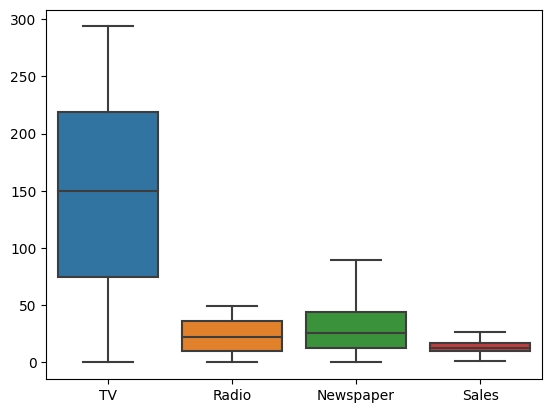

In [9]:
sns.boxplot(df)
plt.show()

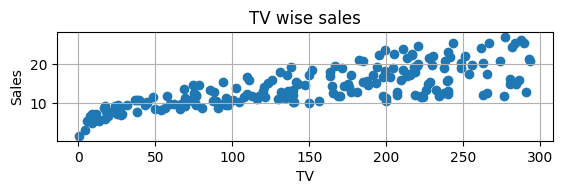

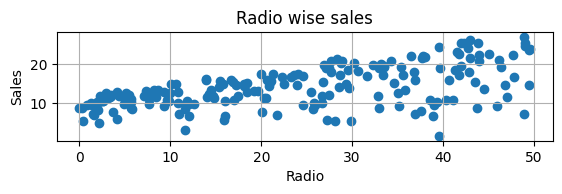

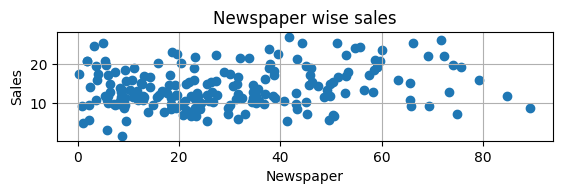

In [10]:
for i,j in zip(df.drop(["Sales"],axis=1).columns,range(1,4)):
    plt.subplot(3,1,j)
    plt.scatter(x=df[i],y=df["Sales"])
    plt.xlabel(i)
    plt.ylabel("Sales")
    plt.title(f"{i} wise sales")
    plt.grid(True)
    plt.show()

/tmp/ipykernel_15914/1869937202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


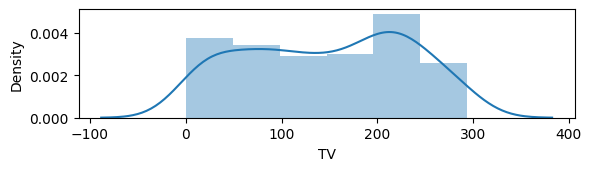

/tmp/ipykernel_15914/1869937202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


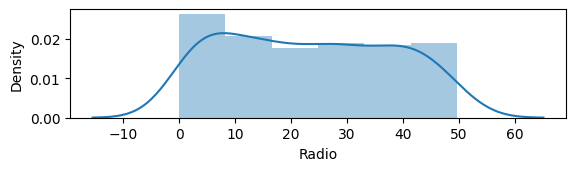

/tmp/ipykernel_15914/1869937202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


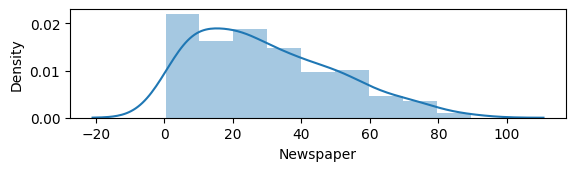

In [11]:
for i,j in zip(df.columns,range(1,4)):
    plt.subplot(3,1,j)
    sns.distplot(df[i])
    plt.show()

/home/datahagward/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


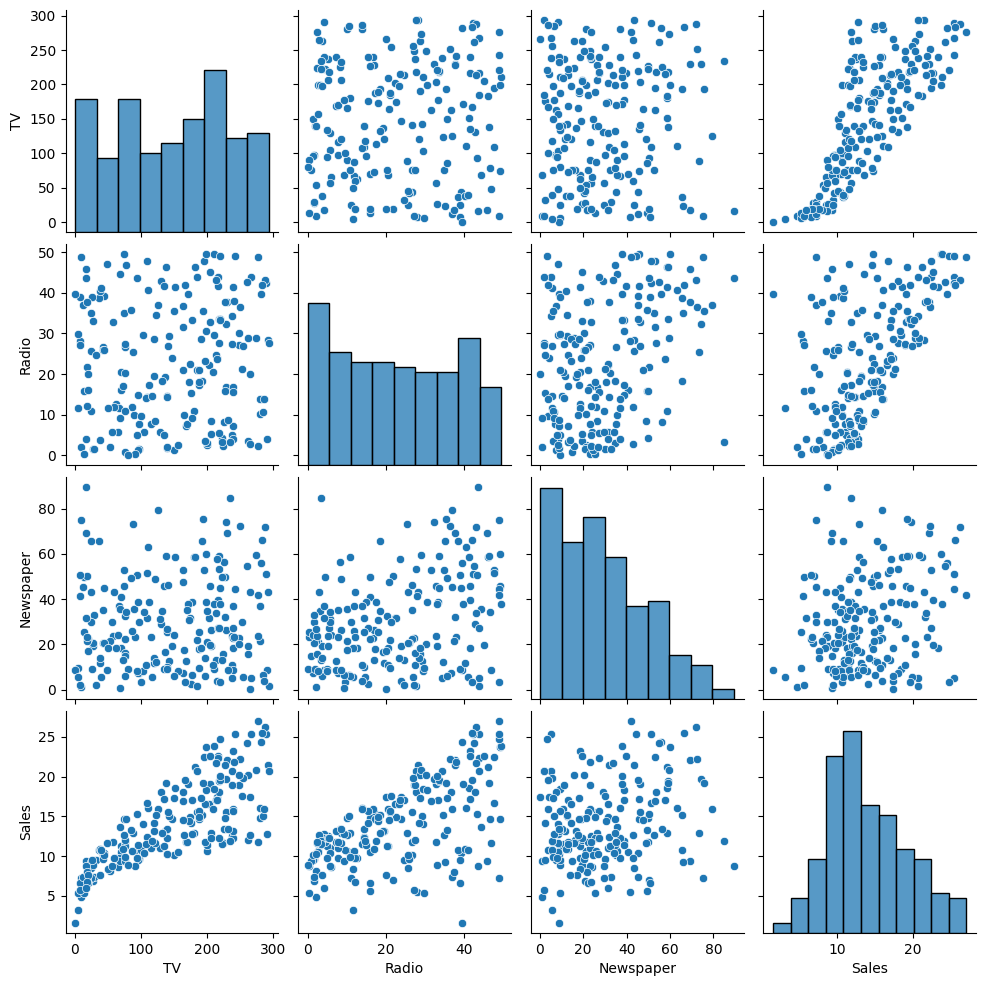

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
x = df.drop(["Sales"],axis=1)
y = df["Sales"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=2)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
model = SVR(C=10)
model.fit(x_train,y_train)

SVR(C=10)

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score :",r2_score(y_pred,y_test))
print("mean_squared_error :",mean_squared_error(y_pred,y_test))
print("rmse :",np.sqrt(mean_squared_error(y_pred,y_test)))

r2_score : 0.9499661621691031
mean_squared_error : 1.2656202874241824
rmse : 1.124997905519909
